[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial4.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial4.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# **Tutorial 4: Arithmetic and Aggregation Methods**

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google deepmind

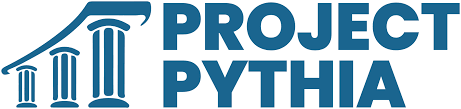 | 
-
Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851



# **Tutorial Objectives**

As we just learned in the video, alongside the latitudinal temperature gradients set by solar radiation, the large-scale ocean circulation patterns are one of the main controls on global sea surface temperature (SST, or tos). The surface currents distort this meridional gradient and can transport heat globally. In this tutorial, we'll use a series of tools in Xarray to interpret sea surface temperature data. 

Specifically, we’ll import monthly SST data from the Community Earth System Model  v2 (CESM2), which is a Global Climate Model. A climate model is a mathematical representation of Earth's climate system components and their interactions. Climate models are based on well-documented physical processes to simulate the transfer of energy and materials through the climate system. You'll learn more about climate models later this week and next week, but for now, we're going to be working with SST data produced from a climate model. 

To assess global variations in this SST dataset, we will practice using multiple attributes of Xarray:


*   Arithmetic methods to convert temperatures from Celsius to Kelvin
*   Aggregation methods to calculate mean, median, minimum and maximum values of the data.


Finally, we'll create a map of global mean annual SST to visualize spatial variations in SST.


# **Setup**


In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd
import matplotlib.pyplot as plt

##  Figure Settings


###  Figure Settings


####  Figure Settings


#####  Figure Settings


In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

##  Video 1: Video Title


###  Video 1: Video Title


####  Video 1: Video Title


#####  Video 1: Video Title


In [ ]:
# @title Video 1: Video Title
#Tech team will add code to format and display the video

# Section 1: Arithmetic Operations

Arithmetic operations with a single `DataArray` automatically apply over all array values (like NumPy). This process is called **vectorization**.  First, let's open the monthly sea surface temperature (SST) data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model.

In [ ]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath)
ds

And look at the temeprature variable `tos`.

In [ ]:
ds.tos

Note in the attributes that the units are 'degC'. One arithmetic operation we can do is to the  convert the temperature from degrees Celsius to Kelvin:

In [ ]:
ds.tos + 273.15


You may notice that there are a lot of NaN values in the DataArray for `tos`. NaN isn’t a bad thing and it just means there isn’t data for those coordinates. In this case, there's no `tos` data for areas with land since this dataset only contains SST values.


Just to practice another arithmetic operation, lets's square all values in `tos`:

In [ ]:
ds.tos**2

# **Section 2: Aggregation Methods**

A very common step during data analysis is to summarize the data in question by computing aggregations like `sum()`, `mean()`, `median()`, `min()`, `max()` in which reduced data provide insight into the nature of the large dataset. For example, in the introductory video for this tutorial, we saw maps of the mean annual sea surface temperature and sea surface density. 


The following table summarizes some other built-in xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |


Let's explore some of these aggregation methods.


Compute the temporal minimum:

In [ ]:
ds.tos.min(dim='time')

Compute the spatial sum:

In [ ]:
ds.tos.sum(dim=['lat', 'lon'])

Compute the temporal median:

In [ ]:
ds.tos.median(dim='time')

Compute the mean SST:

In [ ]:
ds.tos.mean()

Because we specified no `dim` argument, the function was applied over all dimensions, computing the mean of every element of `tos` across time and space. It is possible to specify a dimension along which to compute an aggregation. For example, to calculate the mean in time for all locations (i.e. the global mean annual SST), specify the time dimension as the dimension along which the mean should be calculated:

In [ ]:
ds.tos.mean(dim='time').plot(size=7, vmin = -2, vmax = 32, cmap = 'coolwarm');

### **Questions 2: Climate Connection**

Observe the spatial patterns in SST and consider the following in the context of the components of the ocean climate system we learned about in the video:
1. Recall that upwelling commonly occurs off the west coast of continents, for example, in the eastern tropical Pacific off the west coast of South America. Do you see evidence for upwelling in this region? How do you think the mean SST in this region would change if you looked at a specific season rather than the annual mean? Would upwelling be more or less evident?

[*Click for solution*](https://github.com/ClimateMatchAcademy/course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial4_Solution_6ce26e59.py)



# **Summary**

In this tutorial, we have explored the use of the CESM2 and have imported and analyzed monthly sea surface temperature (SST, or tos) data. We used arithmetic methods to convert SST from Celsius to Kelvin, and aggregation methods such as the mean, median, minimum, and maximum values of the data. To conclude, we visualized the spatial variations in SST by generating a map of the global mean annual SST. This tutorial has provided us with valuable insights into global variations in SST and how to manipulate and analyze such data using Xarray.


# **Resources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).